In [33]:
import pandas as pd

In [34]:
real_df_1 = pd.read_excel('../datasets/online_retail_II.xlsx', sheet_name='Year 2009-2010')

In [35]:
real_df_2 = pd.read_excel('../datasets/online_retail_II.xlsx', sheet_name= 'Year 2010-2011')

In [36]:
real_df = pd.concat([real_df_1, real_df_2])

In [37]:
df = real_df.copy()

In [38]:
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[us]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(3), str(1)
memory usage: 73.3+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [47]:
isna_counts = df.isna().sum().to_dict()
isna_counts = pd.DataFrame.from_dict(isna_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
Customer ID,243007,22.77
Description,4382,0.41
StockCode,0,0.00
Invoice,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
Price,0,0.00
Country,0,0.00


In [40]:
duplicated_counts = df.duplicated().sum()
print('Count of Duplicated Rows: ', duplicated_counts)

duplicated_samples = df[df.duplicated()]
display(duplicated_samples.head())

Count of Duplicated Rows:  34335


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [48]:
nunique_counts = dict()
for i in df.columns:
    nunique_counts[i] = df[i].nunique()

nunique_counts = pd.DataFrame.from_dict(nunique_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
nunique_counts['Percentage'] = round((nunique_counts['Count'] / len(df)) * 100, 2)
print('Count of Unique Values: ')
nunique_counts

Count of Unique Values: 


,Count,Percentage
Invoice,53628,5.02
InvoiceDate,47635,4.46
Customer ID,5942,0.56
Description,5698,0.53
StockCode,5305,0.50
Price,2807,0.26
Quantity,1057,0.10
Country,43,0.00


In [42]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

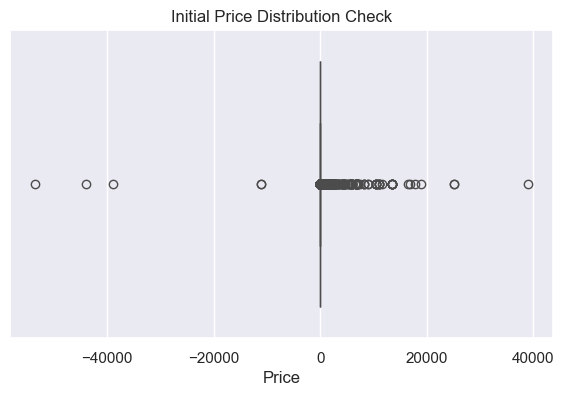

,count,mean,std,min,25%,50%,75%,max
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0


In [43]:
plt.figure(figsize=(7,4))
plt.title('Initial Price Distribution Check')

sns.boxplot(x=df['Price'], orient='y')
plt.show()

price_desc = pd.DataFrame(df['Price'].describe()).transpose()
display(price_desc)


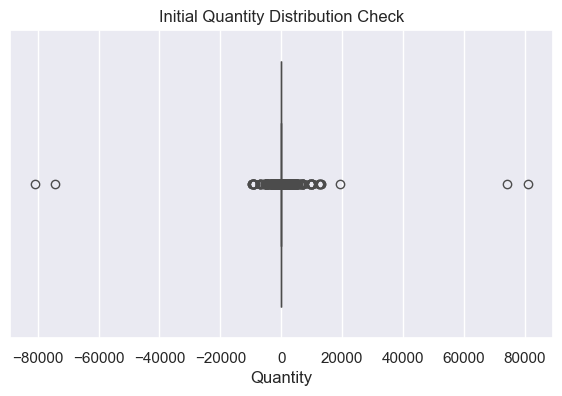

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0


In [44]:
plt.figure(figsize=(7,4))
plt.title('Initial Quantity Distribution Check')

sns.boxplot(x=df['Quantity'], orient='y')
plt.show()

quantity_desc = pd.DataFrame(df['Quantity'].describe()).transpose()
display(quantity_desc)
